# ISPR Midterm 2 Assignment 3
## Alessandro Bucci MAT. 638619

Implement from scratch an RBM and apply it to DSET3. The RBM should be implemented fully by you (both CD-1 training and inference steps) but you are free to use library functions for the rest (e.g. image loading and management, etc.).

1.     Train an RBM with a number of hidden neurons selected by you (single layer) on the MNIST data (use the training set split provided by the website).

2.     Use the trained RBM to encode a selection of test images (e.g. using one per digit type) using the corresponding activation of the hidden neurons.

3.     Reconstruct the original test images from their hidden encoding and confront the reconstructions with the original image (use a suitable quantitative metric to assess the reconstraction quality and also choose few examples to confront visually).

### Importing libraries

In [23]:
import matplotlib.pyplot as plt
from sklearn.utils import gen_batches
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np


### Loading MNIST
from fetch_openml since the data is easier to get this way in order to re-execute the notebook

In [24]:
x, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

#Binarization of the image
x /= 255 
x = (x > 0.5)

#original split of mnist is 60000 for training and 10000 for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10000)

c:\Users\Kaos1\mambaforge\envs\ispr_mid2_2023\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [25]:
def get_image(image_index, dataset):
    try:
        return dataset[image_index,:].reshape(28,28) 
    except:
        return None
    
def get_single_number_dataset(number, x, y_str):
    Y = np.array([int(y) for y in y_str])
    return x[Y == number] if np.abs(number) <= 9 else None 


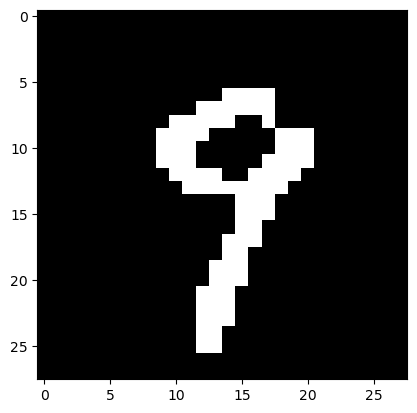

In [26]:
x = get_single_number_dataset(9, x_train, y_train)

for i in range(2):
    plt.imshow(x[i,:].reshape(28,28), cmap='gray')
    #plt.show() # Show the image

### RBM implementation

In [43]:
class RBM():

	def __init__(self, visible_size, hidden_size):
		# layer sizes
		self.visible_size = visible_size
		self.hidden_size = hidden_size
		# weight matrix
		self.W = np.random.randn(visible_size, hidden_size)
		# biases
		self.bh = np.random.randn(hidden_size)
		self.bv = np.random.randn(visible_size)
    
  
	def fit(self, X, epochs=20, batch_dim=32, lr=0.1):

		for epoch in range(epochs):

			error_epoch = 0
			batches = list(gen_batches(X.shape[0], batch_dim)) # for easily subdivide the batches
			
			for batch in batches:
				batch = X[batch.start:batch.stop]
				batch_size = batch.shape[0]
				
				# same as using the 1. in the slides
				one_h = np.ones((batch_size, self.hidden_size))
				one_v = np.ones((batch_size, self.visible_size))

				# Wake - P(h|v)
				poshidP = one_h / (one_h + np.exp(-np.dot(batch,self.W) - self.bh))
				wake = np.dot(batch.T, poshidP)

				# Dream - P(v|h)
				reconDataP = one_v / (one_v + np.exp(-np.dot(poshidP, np.transpose(self.W))-self.bv))
				neghidP = one_h / (one_h + np.exp(-np.dot(reconDataP, self.W) - self.bh))
				dream = np.dot(np.transpose(reconDataP), neghidP)

				# Reconstruction error
				error = np.sum((batch-reconDataP)**2)/batch_size

				# CD-1 update
				self.W += lr*(wake-dream)/batch_size
				self.bh += lr*(np.sum(poshidP-neghidP, axis=0))/batch_size
				self.bv += lr*(np.sum(batch-reconDataP, axis=0))/batch_size

				error_epoch += error

			error_epoch /= len(batches)
			print("Epoch " + str(epoch)+ " error = " + str(error_epoch))

	def reconstruct(self, X): 

		one_h = np.ones((X.shape[0], self.hidden_size))
		one_v = np.ones((X.shape[0], self.visible_size))

		poshidP = one_h / (one_h + np.exp(-np.dot(X,self.W)-self.bh))
		poshidS = poshidP > np.random.uniform(size=poshidP.shape)
		
		reconDataP = one_v / (one_v + np.exp(-np.dot(poshidS,np.transpose(self.W))-self.bv))

		return reconDataP
	
	def encode(self, X):
		one = np.ones((X.shape[0], self.hidden_size))
		
		poshidP = one / (one + np.exp(-np.dot(X,self.W)-self.bh))

		return poshidP

Training the RBM

In [44]:
rbm = RBM(x_train.shape[1], 25)
rbm.fit(x_train, epochs=25, batch_dim=32, lr=0.5)

Epoch 0 error = 47.143175994604015
Epoch 1 error = 42.15367063024711
Epoch 2 error = 41.90090299766878
Epoch 3 error = 41.918048397884284
Epoch 4 error = 41.64653697582626
Epoch 5 error = 41.25930508749679
Epoch 6 error = 40.658653907678705
Epoch 7 error = 40.17427114884308
Epoch 8 error = 39.801519531408736
Epoch 9 error = 39.47635055620122
Epoch 10 error = 39.29341101094989
Epoch 11 error = 39.10567462150345
Epoch 12 error = 38.90044830849397
Epoch 13 error = 38.763203899273336
Epoch 14 error = 38.69355362095568
Epoch 15 error = 38.59924324570319
Epoch 16 error = 38.41969141757702
Epoch 17 error = 38.215578389409536
Epoch 18 error = 37.9873629197449
Epoch 19 error = 37.66682597662406
Epoch 20 error = 37.59151908195747
Epoch 21 error = 37.63772412541174
Epoch 22 error = 37.66468300472546
Epoch 23 error = 37.65097706441452
Epoch 24 error = 37.608238252344684


### Encoding
first we construct the dataset comprised of one digit per type

In [32]:
x_sample = list()

for i in range(10):
    x = get_single_number_dataset(i, x_train, y_train)
    x_sample.append(x[i,:])

x_sample = np.array(x_sample)

plotting the sample set:

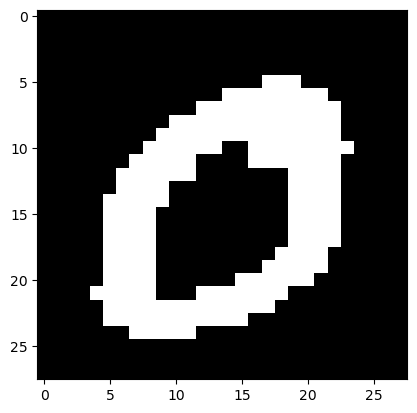

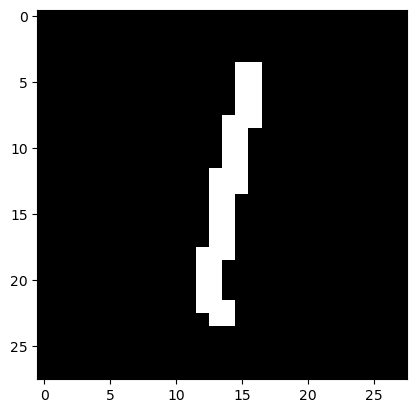

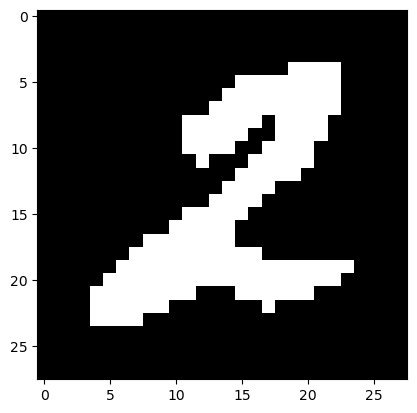

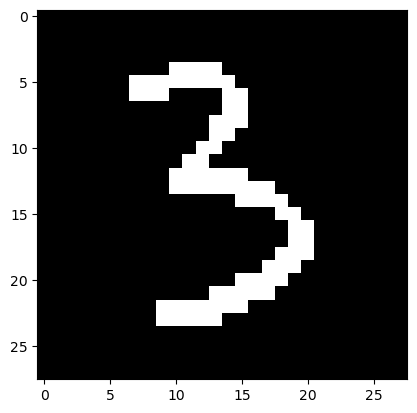

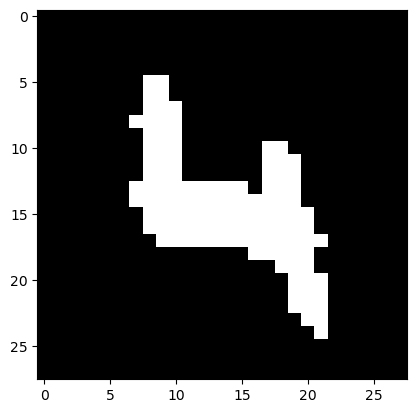

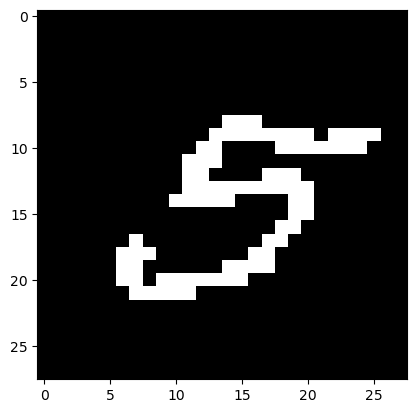

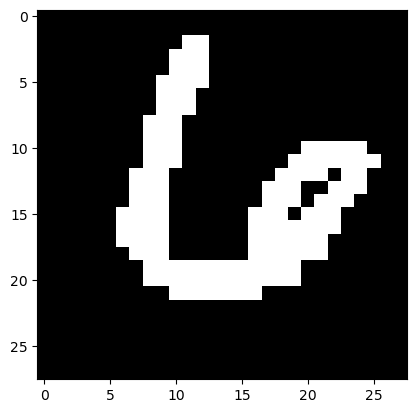

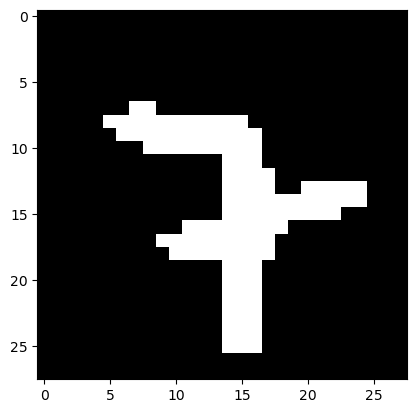

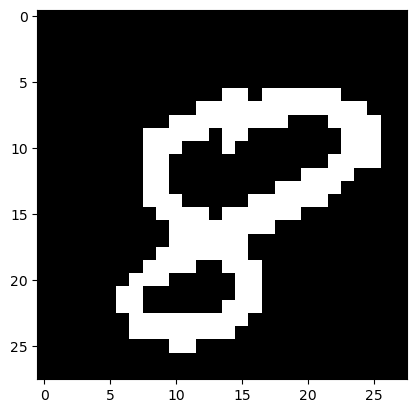

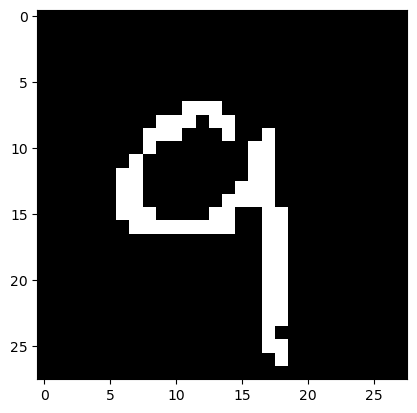

In [33]:
for i in range(10):
    plt.imshow(x_sample[i].reshape(28,28), cmap='gray')
    plt.show()

Plotting their enconding (I have chosen 25 as the number of hidden neuron to plot an image to compare to the original, hoping it could be meaningful)

In [34]:
x_sample_encoded = rbm.encode(x_sample)

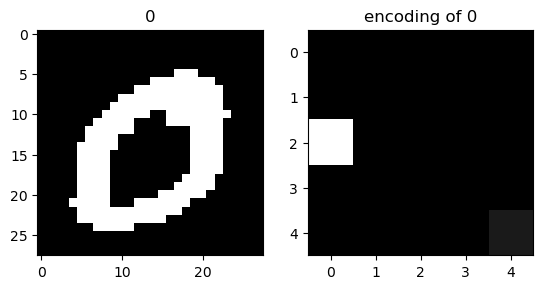

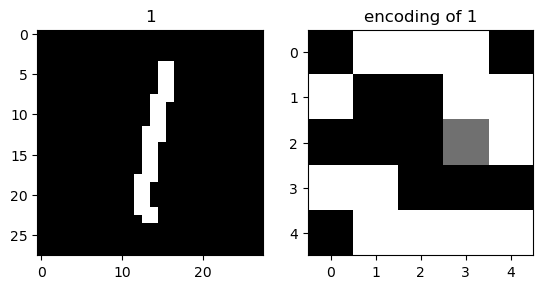

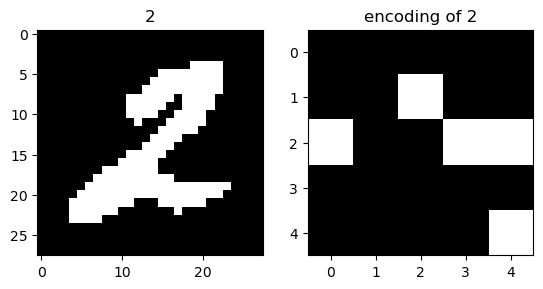

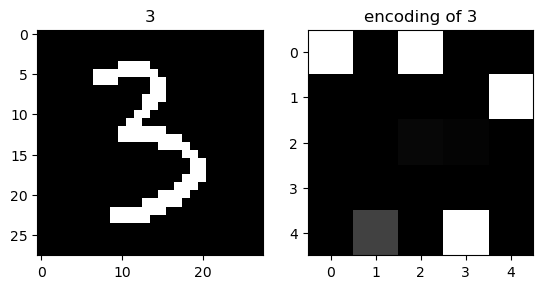

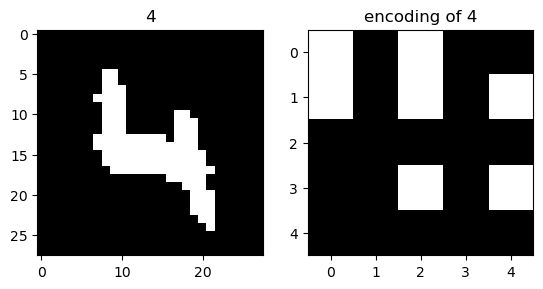

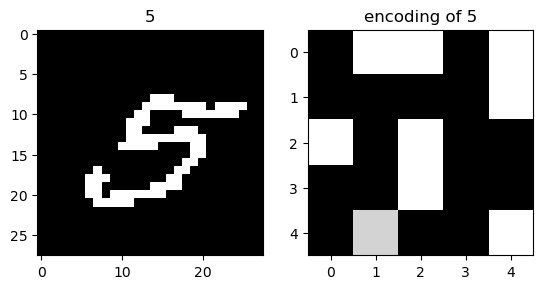

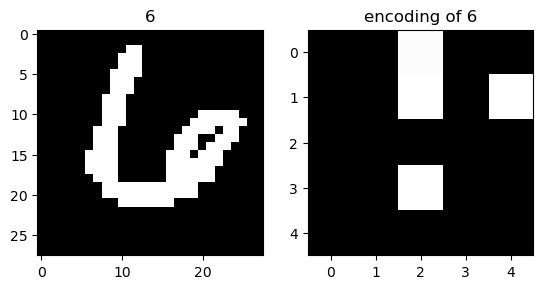

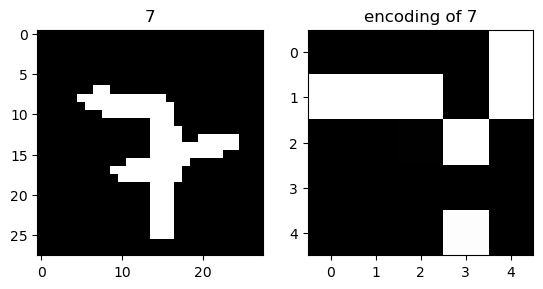

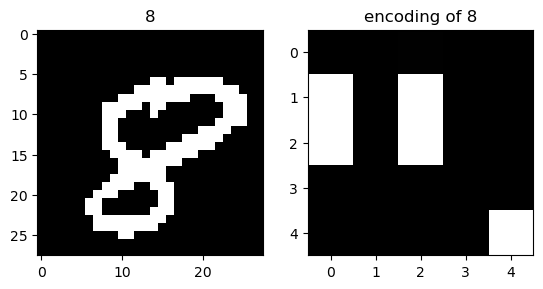

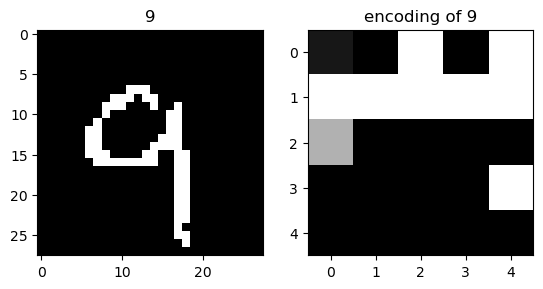

In [35]:
for i in range(10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title(i)
    ax2.set_title("encoding of "+ str(i))
    ax1.imshow(x_sample[i].reshape(28,28), cmap='gray')
    ax2.imshow(x_sample_encoded[i].reshape(5,5), cmap='gray')
    plt.show()

Although there is anything meaningful that emerged in these representations, it can be noted that the enconding of 7 and 9 are somewhat similar, probably because they share part of the shapes.

### Reconstruction
Now we will proceed with the reconstruction of the same sample dataset:

In [38]:
x_sample_encoded = rbm.reconstruct(x_sample)

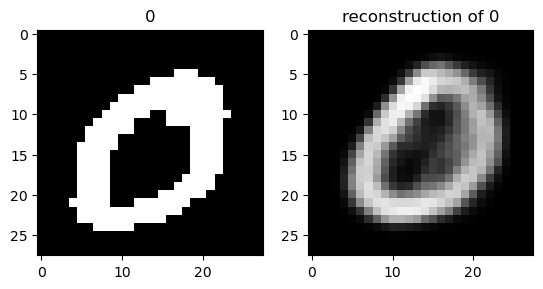

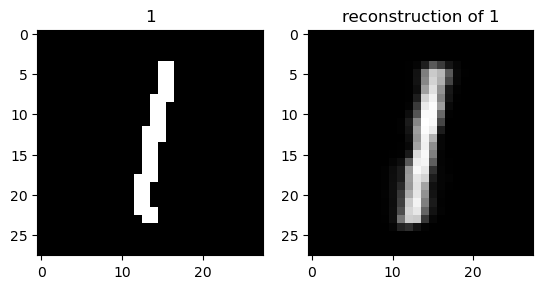

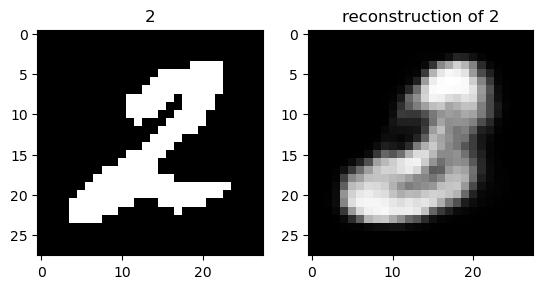

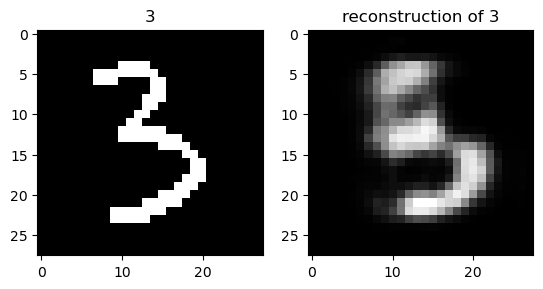

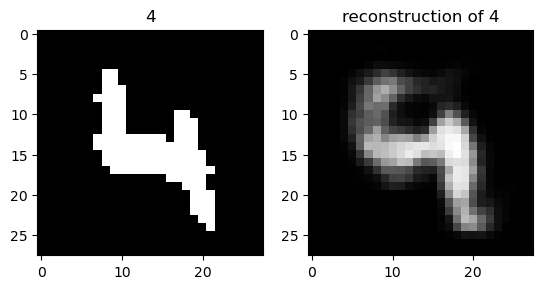

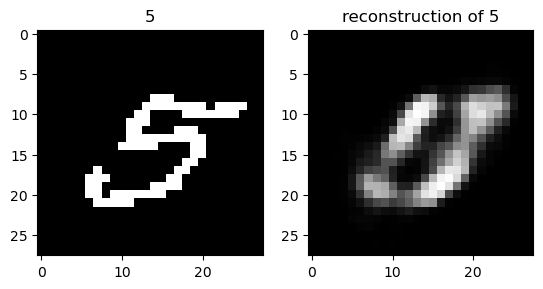

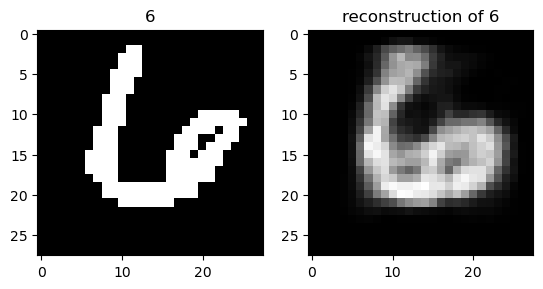

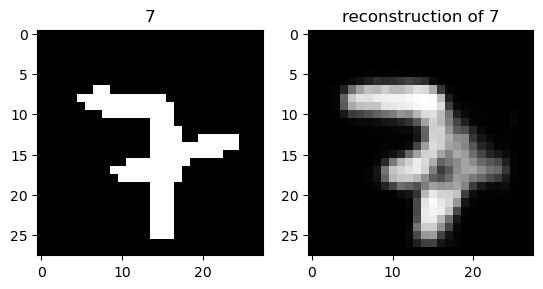

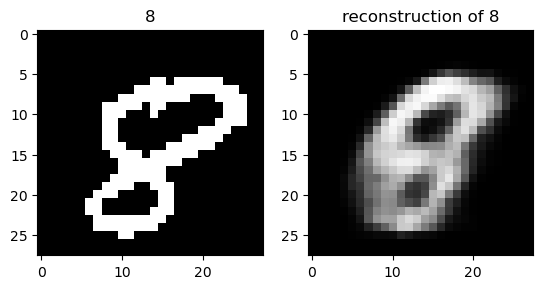

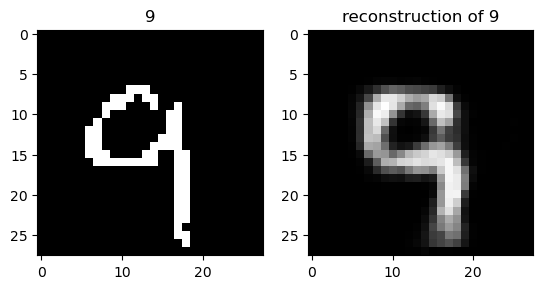

In [39]:
for i in range(10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title(i)
    ax2.set_title("reconstruction of "+ str(i))
    ax1.imshow(x_sample[i].reshape(28,28), cmap='gray')
    ax2.imshow(x_sample_encoded[i].reshape(28,28), cmap='gray')
    plt.show()

It can be noted that for some number the reconstruction achieved a very good result such as 0, 1, 6, 8 and 9. If we see 2, it can be noted that the reconstruction vaguely resemble a 8. 5 is almost unrecognizable. 3's reconstruction became something more similar to 5. 7 is still recognizable although has an hole in the middle. 4 has become a 9, but it still resemble the original (badly written) image.

### Personal notes

Different combination of hyperparameters and/or using an optimization technique such as momentum descent could yield a better performing RBM, a model selection phase is advised. 